# **Course Work B**

In the first code cell all the necessary libraries are imported like numpy and matplotlib. Tensorflow and Keras will be the deep learning frameworks that will be used for training and evaluating the neural networks in this notebook.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

import tensorflow as tf
from tensorflow import keras

import matplotlib.style
import matplotlib as mpl

print(tf.__version__)

2.17.1


MNIST dataset is downloaded. The shapes and lengths are printed just to confirm the dimensions of the data set and a sample image is displayed just to get a sense of what kind of data the neural network will be trained on.

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("First label:",train_labels[0])
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
First label: 5
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


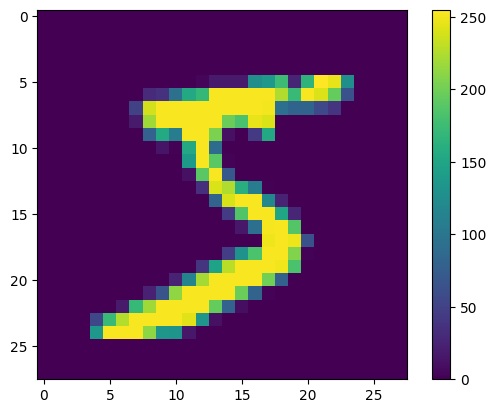

In [ ]:
plt.imshow(train_images[0])
plt.colorbar()

In [ ]:
def addNoiseToMNIST(yNoise, data):
  """
    Adds random noise to the input MNIST images within the range [0, yNoise].

    This function creates random noise drawn from a uniform distribution [0, yNoise]
    and adds it to the original MNIST data. It then clips any values above 255
    to maintain valid pixel range (0 to 255).

    Args:
        yNoise (float): The upper bound for noise.
        data (numpy.ndarray): The MNIST image data to which noise will be added.
                              Can be a single image of shape (28, 28) or a batch
                              of images with shape (N, 28, 28).

    Returns:
        numpy.ndarray: A NumPy array of the same shape as the data, containing
                       the noisy images. All pixel values are clipped to
                       remain in the range [0, 255].
    """
  noise = np.random.uniform(low=0, high=yNoise, size=data.shape)
  noisy_data = data + noise
  noisy_data = np.clip(noisy_data, 0, 255)
  return noisy_data

Here the MNIST data set is loaded. Train_images and Train_labels are the training set (60,000 images). Test_images and Test_labels are the test set (10,000 images). First image and label are sampled. Then and array of noise magnutudes is defined and a loop is used to loop over the chosen noise levels with the previously defined addNoiseMNIST() function. Each iteration produces a noisy version of the original with the predefined noise levels.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
test_image = train_images[0]
test_label = train_labels[0]
print("Label:",test_label)

yNoise_values = [0, 20, 50, 100]
noisy_image = []

for yNoise in yNoise_values:
  noisy_image = addNoiseToMNIST(yNoise, test_image)

Label: 5


In [ ]:
def plot_noisy_image(test_image, yNoise_values):
  """
    Plots the original MNIST image and its noisy versions side by side.

    This function takes a single MNIST image and a list of noise levels.
    It displays the original image along with several images each perturbed
    by a specified amount of noise.

    Args:
        test_image (numpy.ndarray): A single MNIST image of shape (28, 28).
        yNoise_values (list or array): A list/array of noise levels to add to
                                       the input image.

    Returns:
        tuple: A tuple where:
               - fig is the Matplotlib figure object.
               - axes is an array of the subplot axes.
    """
  number_images = len(yNoise_values) + 1
  fig, axes = plt.subplots(1,number_images, figsize=(15,6))
  axes[0].imshow(test_image, cmap='Blues')
  axes[0].set_title("Original Image")

  for i, yNoise in enumerate(yNoise_values):
    noisy_image = addNoiseToMNIST(yNoise, test_image)
    axes[i+1].imshow(noisy_image, cmap='Blues')
    axes[i+1].set_title(f"Noisy Image (yNoise={yNoise})")

  plt.tight_layout()
  plt.show()
  return fig, axes


Plotting the results. As it can be seen as the noise level increases the image becomes less clear. This plot helps visualise what kind of data the later neural networks will be trained on.

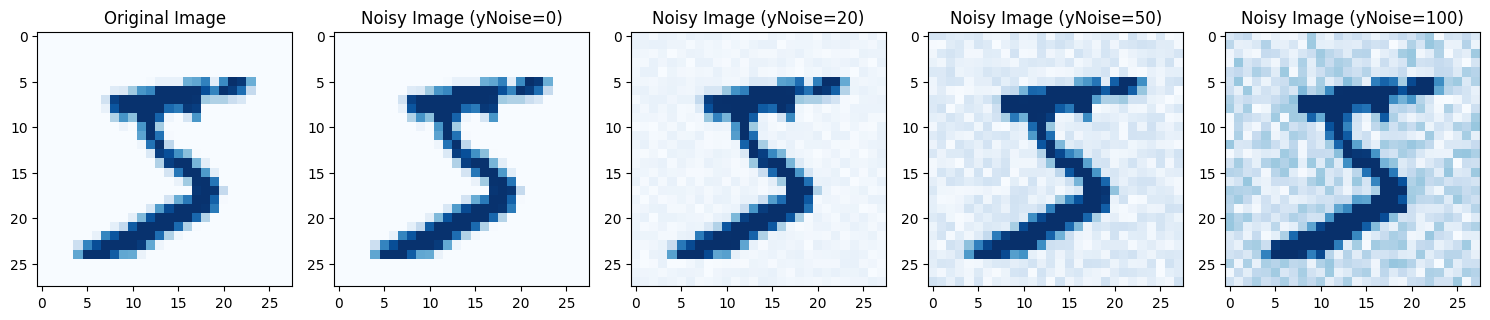

(<Figure size 1500x600 with 5 Axes>,
 array([<Axes: title={'center': 'Original Image'}>,
        <Axes: title={'center': 'Noisy Image (yNoise=0)'}>,
        <Axes: title={'center': 'Noisy Image (yNoise=20)'}>,
        <Axes: title={'center': 'Noisy Image (yNoise=50)'}>,
        <Axes: title={'center': 'Noisy Image (yNoise=100)'}>], dtype=object))

In [ ]:
plot_noisy_image(test_image, yNoise_values)

A simple neural network is initilised with a hidden layer of 128 neurons and a ReLU activation function. The loss function is SparseCategoricalCrossentropy and the optimiser is Adam.

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

The model is trained on the original MNIST data set with no noise. 30 epochs, a batch size of 100 and 10% of the training set as a validatoin set is used a the hyperparameters. The validaition set is the subset of the training data that will be held out to asses the performance of the model and tune the hyperparameters. If the model performs well on the trianing set and poorly on the validation set it means its overfitting, i.e memorising the training set instead of learning.

In [ ]:
history=model.fit(train_images, train_labels,batch_size=100, epochs=30, validation_split = 0.1)

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7796 - loss: 10.5041 - val_accuracy: 0.8845 - val_loss: 0.5562
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8927 - loss: 0.5082 - val_accuracy: 0.9212 - val_loss: 0.3399
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9249 - loss: 0.3063 - val_accuracy: 0.9372 - val_loss: 0.2828
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9368 - loss: 0.2351 - val_accuracy: 0.9445 - val_loss: 0.2524
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9492 - loss: 0.1816 - val_accuracy: 0.9540 - val_loss: 0.2105
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9564 - loss: 0.1528 - val_accuracy: 0.9545 - val_loss: 0.2194
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9582 - loss: 0.1532 - val_accuracy: 0.9525 - val_loss: 0.2049
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9620 - loss: 0.1342 - val_accuracy: 0

Original test set is used to evaluate the models performance. Here the baseline performance is depicted without any noise and an expected performance of 95% or above is reached as required.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9595 - loss: 0.3718

Test accuracy: 0.9595000147819519


A loop is used to loop over yNoise values between 0 and 300 in steps of 25. for each noise level entry, noise is added to the training images and evaluated with model.evaluate(). This is being tracked and stored in the empty array and a plot is used to depict the evolution of the accuracy with the growing noise. As expected the growing noise exponantioally decreases the performance of the model, with a drastic drop in the accuracy between the values of 10-100 and a plateu further on. This is an acceptable results as the model is trained on images without noise.

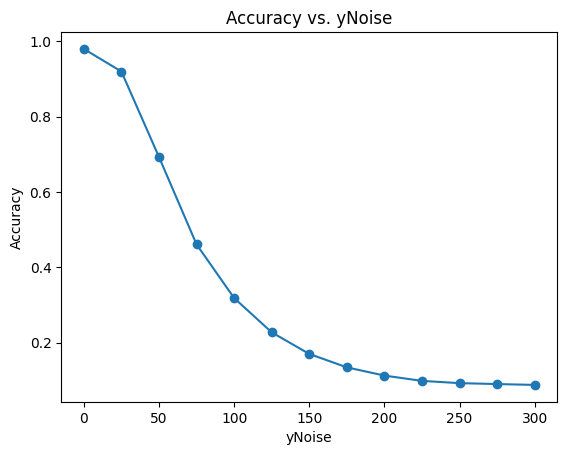

In [ ]:
yNoise_values = np.arange(0, 301, 25)
accuracy_values = []

for yNoise in yNoise_values:
  noisy_train_images = addNoiseToMNIST(yNoise, train_images)
  _, accuracy = model.evaluate(noisy_train_images, train_labels, verbose=0)
  accuracy_values.append(accuracy)

plt.plot(yNoise_values, accuracy_values, marker='o')
plt.xlabel('yNoise')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. yNoise')
plt.show()

A set noise_level = 5 is selected and added to the training set. A copy of the original model is created as to not overwrite the structure of the previous model. After, this copy is trained on the training set with the noise added and evaluated on the original clean set. This is useful because it can display that training a model on a noisy set can improve its performance on unclear and clear data sets.

In [ ]:
noise_level = 5
noisy_test_images = addNoiseToMNIST(noise_level, train_images)

In [ ]:
copy_model = keras.models.clone_model(model)
copy_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [ ]:
history=copy_model.fit(noisy_test_images, train_labels,batch_size=100, epochs=30, validation_split = 0.1)

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7848 - loss: 10.2965 - val_accuracy: 0.8665 - val_loss: 0.5739
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8807 - loss: 0.5466 - val_accuracy: 0.9155 - val_loss: 0.3599
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9214 - loss: 0.3185 - val_accuracy: 0.9342 - val_loss: 0.2812
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9351 - loss: 0.2436 - val_accuracy: 0.9420 - val_loss: 0.2563
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9460 - loss: 0.1953 - val_accuracy: 0.9483 - val_loss: 0.2515
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9511 - loss: 0.1784 - val_accuracy: 0.9527 - val_loss: 0.2209
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9563 - loss: 0.1546 - val_accuracy: 0.9543 - val_loss: 0.1981
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9573 - loss: 0.1516 - val_accuracy: 0

In [ ]:
test_loss, test_acc = copy_model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.9527 - loss: 0.4684

Test accuracy: 0.9527000188827515


An array of noise levels is defined to be used in the further loop. For each entry in the array the model is retrained from scratch on the noisy version of the data set. Then its accuracy on the clean set is tested. The accuracies are stored in an empty array for plotting and are displayed on the graph. The graph depicts the highest performance on noise level = 5 this means a small addition of noise has benefitted the models accuracy but as the noise increases drastically it counteracts and deteriarates the performance of the model. The performance is defined here as the test accuracy, but also could be counted as the accuracy after implemenation of the noise and in both of these categories the model performs relatively well.

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7920 - loss: 12.7165 - val_accuracy: 0.9067 - val_loss: 0.7637
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9092 - loss: 0.6421 - val_accuracy: 0.9212 - val_loss: 0.4117
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9284 - loss: 0.3312 - val_accuracy: 0.9433 - val_loss: 0.3142
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9427 - loss: 0.2375 - val_accuracy: 0.9497 - val_loss: 0.2719
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9492 - loss: 0.1975 - val_accuracy: 0.9543 - val_loss: 0.2484
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9575 - loss: 0.1697 - val_accuracy: 0.9537 - val_loss: 0.2446
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9616 - loss: 0.1432 - val_accuracy: 0.9530 - val_loss: 0.2476
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9624 - loss: 0.1369 - val_accuracy: 0

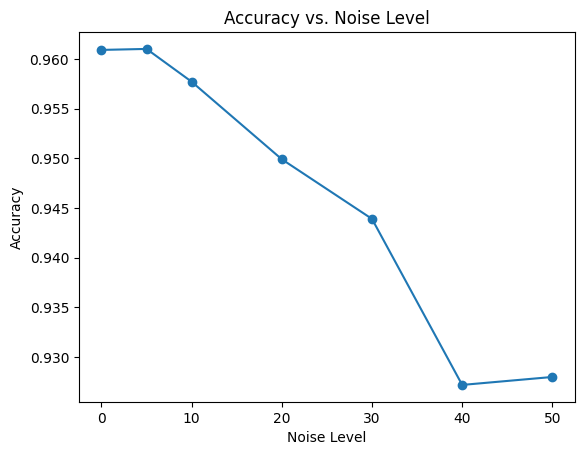

In [ ]:
noise_levels = [0, 5, 10, 20, 30, 40, 50]

accuracy_diff_noise = []

for noise in noise_levels:
  copy_model = keras.models.clone_model(model)
  copy_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
  noisy_test_images = addNoiseToMNIST(noise, train_images)
  copy_model.fit(noisy_test_images, train_labels,batch_size=100, epochs=30, validation_split = 0.1)
  _, test_acc = copy_model.evaluate(test_images, test_labels, verbose=2)
  accuracy_diff_noise.append(test_acc)

best_noise = noise_levels[np.argmax(accuracy_diff_noise)]
print(f"Best noise level: {best_noise}")
plt.plot(noise_levels, accuracy_diff_noise, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Noise Level')

plt.show()
